In [36]:
import sys
sys.path.append('../src')

import pickle
import matplotlib.pyplot as plt
import geopandas as gpd
from iecdt.data import geom
import geoplot as gplt
import numpy as np
from glob import glob
world = geom.get_world()
from IPython.display import Markdown


## summary information of all available chips

In [5]:
chips_geoms = gpd.read_parquet('/opt/data/dora/embeddings/consolidated.parquet')
chips_geoms.shape

(48313, 5)

In [7]:
chips_geoms.head()

,chipset_id,chip_id,season,geometry,lonlat
0,2ebd307bdaafd,00217e53ae025,winter,"POLYGON ((23.505 15.42755, 23.505 15.47379, 23...","[23.528842211411103, 15.450666195202487]"
1,356f2efa4e288,305c4716ab785,fall,"POLYGON ((54.77138 62.73265, 54.77138 62.77865...","[54.821557935421026, 62.755649953351664]"
2,1db1f5fb2866f,0ac172540e823,fall,"POLYGON ((85.51424 26.46238, 85.51424 26.50859...","[85.53991161186431, 26.485483925845262]"
3,16be5dd21ae4c,087a4afcebe35,spring,"POLYGON ((147.82412 64.53943, 147.82412 64.585...","[147.8775275593774, 64.562401914625]"
4,268b8065b9d36,1bacb25ff4da4,winter,"POLYGON ((0.87037 15.94743, 0.87037 15.99368, ...","[0.8942767029818856, 15.970550853338139]"


## show where chips are

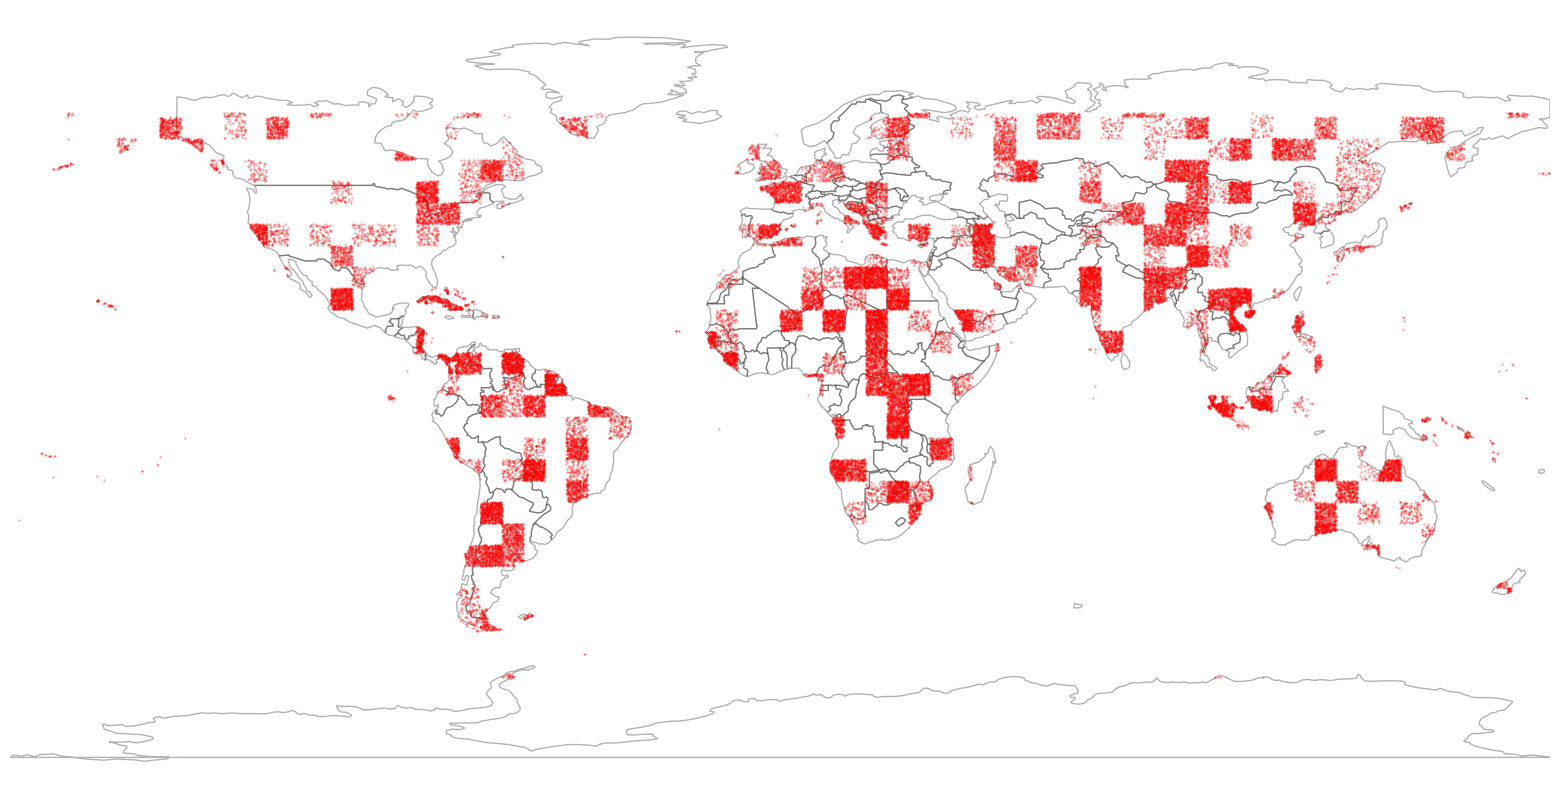

In [18]:
lonlats = np.r_[[np.r_[i] for i in chips_geoms.lonlat.values]]

ax = plt.figure(figsize=(20,10)).subplots(1,1)
gplt.polyplot(world, alpha=0.3,  ax=ax)
plt.scatter(lonlats[:,0], lonlats[:,1], color='red', alpha=.7, s=.1)

## show a random chip

In [27]:
files = glob('/opt/data/dora/embeddings/consolidated/*')
len(files)

48313

In [70]:
file = np.random.choice(files)
file

np.str_('/opt/data/dora/embeddings/consolidated/1ccbadb22ebe9.pkl')

In [71]:
with open(file, 'rb') as f:
    z = pickle.load(f)
z.keys()

dict_keys(['chipset_id', 'chip_id', 'season', 'description', 'img', 'geometry', 'image_embedding', 'text_embedding', 'lonlat'])

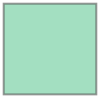

In [72]:
z['geometry']

In [73]:
z['text_embedding'], z['image_embedding']

(array([-0.02468872,  0.0541687 ,  0.03933716, ..., -0.02435303,
         0.0196228 , -0.00495911], shape=(1024,)),
 array([-0.07270487, -0.58252406, -0.41611284, ...,  0.04504026,
        -0.06829812,  0.06894289], shape=(1024,), dtype=float32))

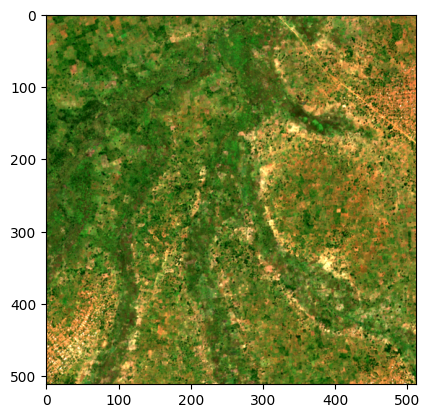

In [74]:
plt.imshow(z['img'])

In [75]:
Markdown(z['description'])

This satellite image depicts a predominantly vegetated area with a mix of forested and open land, possibly indicating a rural or transitional landscape. There are no obvious large-scale man-made structures like cities or major road networks readily apparent.

* **Feature Type:** Mixed forest/woodland
* **Location:** Covers the majority of the image.
* **Size/Extent:** Large, encompassing almost the entire image.
* **Shape/Visual attributes:** Irregular patches of dense, dark green vegetation interspersed with lighter green and tan areas, suggestive of open land or sparser vegetation. The textures vary, with smoother areas likely indicating denser tree cover and rougher textures possibly representing areas with shrubs, grasses, or bare ground.


* **Feature Type:** Possible Riparian Corridor/Drainage Channel
* **Location:** Central portion of the image, running roughly north-south with a slight westward curve.
* **Size/Extent:** Relatively narrow, perhaps a few hundred meters wide, and extends across a significant portion of the image's length.
* **Shape/Visual attributes:** Linear to slightly meandering shape. It appears as a lighter green band, suggesting different vegetation than the surrounding forest, possibly due to higher moisture content.  This could be a stream bed or a consistently damp area.


* **Feature Type:** Open/Cleared Land
* **Location:** Primarily in the eastern portion of the image, with scattered patches throughout.
* **Size/Extent:** Varies from small, irregular patches to larger areas, particularly in the east.
* **Shape/Visual attributes:** Primarily irregular shapes. Color varies from light green to tan, suggesting grasses, bare ground, or other non-forest vegetation.


* **Feature Type:** Possible Tracks/Trails/Minor Roads
* **Location:** Several faint linear features are visible, particularly in the eastern half and the north.
* **Size/Extent:**  Narrow and relatively short.
* **Shape/Visual attributes:** Appear as faint, lighter lines cutting through the vegetation, suggesting they could be dirt roads, tracks, or trails. They are not prominent and lack the clear definition of paved roads.


* **Feature Type:** Textural variation, mottled appearance.
* **Location:** Throughout the image, but more pronounced in the central and eastern sections.
* **Size/Extent:** Varies; patches of different textures intermingle.
* **Shape/Visual attributes:**  The mottled appearance could be due to variations in vegetation density, topography, soil type, or a combination of these factors. The color variations within these mottled areas range from dark green to light tan.  Further analysis with higher-resolution imagery might be needed to determine the specific cause.

It is important to note that without additional context (like geographic location, image resolution, and date of acquisition), this description is interpretative.  Higher-resolution imagery would allow for more precise identification of features and better estimates of size.

This is the geographical location and extent of this satellite image

<location>
	<plus_code>MGHR+6R</plus_code>
	<locality>Balama</locality>
	<administrative_area_level_2>Balama</administrative_area_level_2>
	<administrative_area_level_1>Cabo Delgado Province</administrative_area_level_1>
	<country>Mozambique</country>
	<coords>
		<lon>38.5420</lon>
		<lat>-13.3219</lat>
	</coords>
	<size>
		<width_in_km>5.12</width_in_km>
		<height_in_km>5.12</height_in_km>
	</size>
</location>


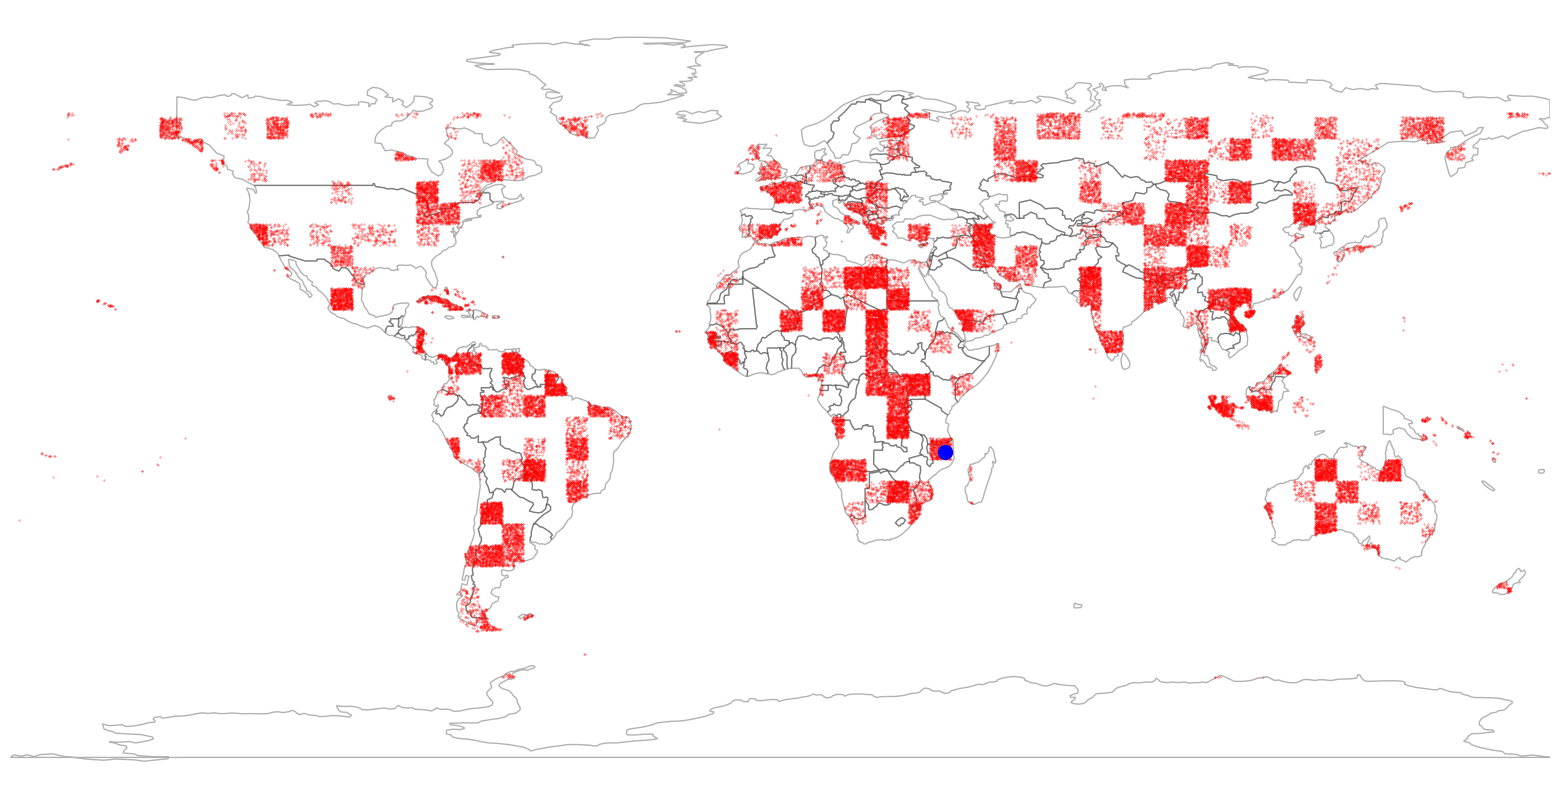

In [76]:
lonlats = np.r_[[np.r_[i] for i in chips_geoms.lonlat.values]]

ax = plt.figure(figsize=(20,10)).subplots(1,1)
gplt.polyplot(world, alpha=0.3,  ax=ax)
plt.scatter(lonlats[:,0], lonlats[:,1], color='red', alpha=.7, s=.1)
plt.scatter(*z['lonlat'], color='blue', s=100)